In [16]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

setGPU: Setting GPU to: 1


In [9]:
gen_model = '/nfshome/vitoriabp/hgcal_wgan/trial4/weights/generator_modeltrial4_bs_32_lr_-7.json'

In [10]:
gen_weights = '/nfshome/vitoriabp/hgcal_wgan/trial4/weights/generator_weights_epoch_700_trial4_bs_32_lr_-7.h5'

In [3]:
def loadModel(name, weights=False):
    '''
    Adapted from Kaustuv Datta and Jayesh Mahapatra's CaloImageMacros.
    Loads models from json file.
    :parameter name: name of the json file.
    :type name: str
    :parameter weights: whether or not to load the weights.
    :type weights: bool
    :return: loaded model.
    '''
    from keras.models import model_from_json
    json_file = open('%s' % name, 'r')
    loaded = json_file.read()
    json_file.close()

    model = model_from_json(loaded)

    # load weights into new model
    if weights == True:
        model.load_weights('%s.h5' % name)
    # print(model.summary())

    print("Loaded model from disk")
    return model

In [11]:
g = loadModel(gen_model)

Loaded model from disk


In [12]:
g.load_weights(gen_weights)

In [13]:
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 16, 16, 55, 1)     565397    
Total params: 565,397
Trainable params: 565,257
Non-trainable params: 140
_________________________________________________________________


In [14]:
latent_space=100
batch_size=128

In [17]:
noise = np.random.normal(0, 1, (batch_size, latent_space))

In [18]:
generated_images = g.predict(noise)

In [28]:
#generated_images.shape

In [19]:
generated_images = generated_images.squeeze()

In [20]:
generated_images[10, :, :, 12].shape

(16, 16)

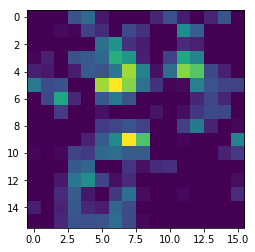

In [21]:
plt.imshow(generated_images[10, :, :, 12])

In [22]:
f = h5py.File('/bigdata/shared/HGCAL_data/new_multi_small/no_pu/ntuple_merged_159_no_pu.h5', 'r')

In [23]:
X = np.asarray(f['X'])

In [24]:
X = X.squeeze()

In [25]:
X[10, :, :, 12].shape

(16, 16)

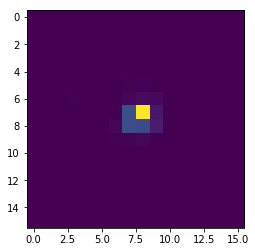

In [26]:
plt.imshow(X[10, :, :, 12])